In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_covid = pd.read_csv("../1_datasets/final_datasets/final_merged_covid_pm25_sdi.csv")
df = df_covid.copy()
# Preview
df.head()

,Country,COVID_Deaths_Rate,upper,lower,Mean_PM25_2010_2019,Year,SDI_mean_value
0,Lao People's Democratic Republic,6.867837e-11,6.867837e-11,6.867837e-11,21.164,2020,0.484193
1,Sri Lanka,2.820345e+00,2.820345e+00,2.820345e+00,23.948,2020,0.697649
2,Fiji,8.084884e+00,1.685940e+01,2.008246e+00,7.272,2020,0.671431
3,Samoa,2.370317e-09,2.370317e-09,2.370317e-09,7.623,2020,0.590075
4,Malaysia,1.516114e+00,2.286782e+00,8.061217e-01,21.670,2020,0.738744


In [3]:
df = df.rename(
    columns={
        "Mean_PM25_2010_2019": "PM25_avg",
        "SDI_mean_value": "SDI",
    }
)

In [4]:
X = df[["PM25_avg", "SDI"]]  # Predictor variables
y = df["COVID_Deaths_Rate"]  # Target variable

# Add intercept term to X
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      COVID_Deaths_Rate   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.178
Date:                Sun, 13 Jul 2025   Prob (F-statistic):              0.116
Time:                        13:30:10   Log-Likelihood:                -1040.8
No. Observations:                 190   AIC:                             2088.
Df Residuals:                     187   BIC:                             2097.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8884     20.564      1.259      0.2

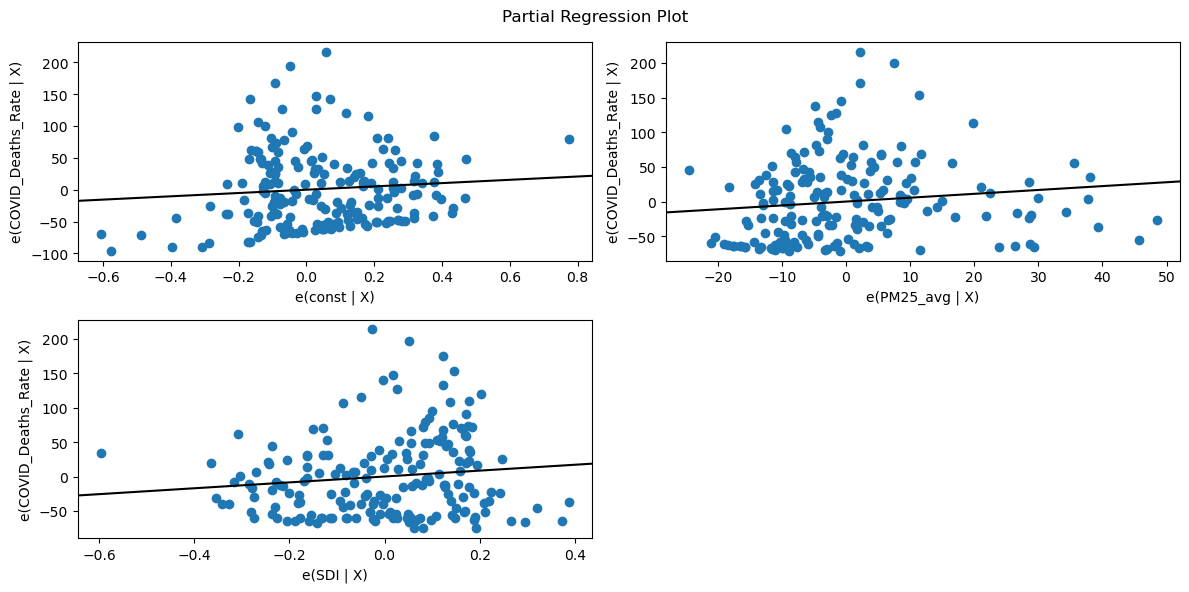

In [12]:
# Plot partial regression plots
fig = plt.figure(figsize=(12, 6))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.tight_layout()
plt.show()

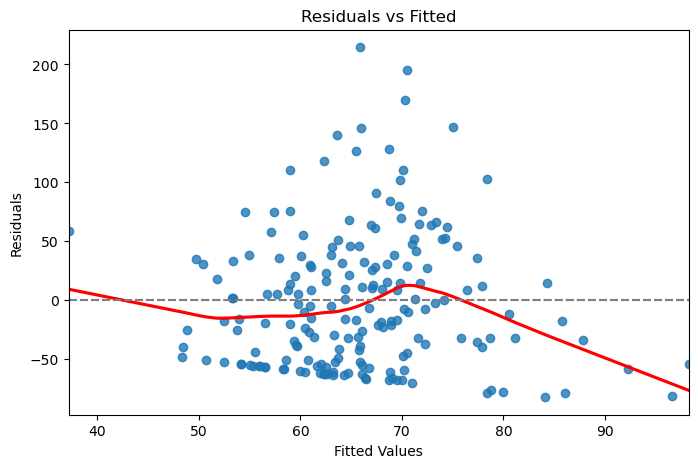

In [5]:
residuals = model.resid
fitted = model.fittedvalues

plt.figure(figsize=(8, 5))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={"color": "red"})
plt.axhline(0, linestyle="--", color="gray")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

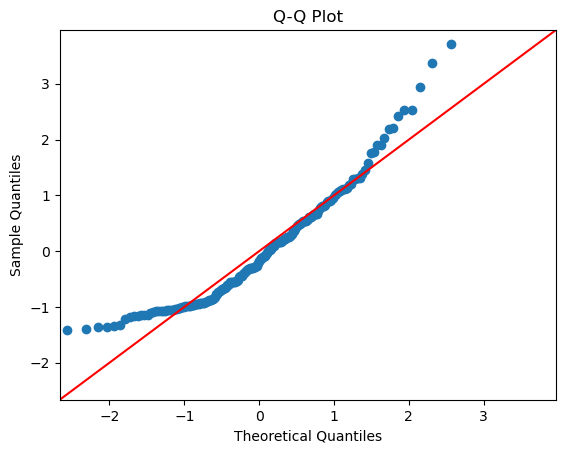

In [6]:
sm.qqplot(residuals, line="45", fit=True)
plt.title("Q-Q Plot")
plt.show()

In [17]:
df["log_death_rate"] = np.log1p(df["COVID_Deaths_Rate"])

In [18]:
# Reuse X from earlier
X = sm.add_constant(df[["PM25_avg", "SDI"]])
y_log = df["log_death_rate"]

# Fit the new model
model_log = sm.OLS(y_log, X).fit()

# Show the results
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:         log_death_rate   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     6.177
Date:                Sun, 13 Jul 2025   Prob (F-statistic):            0.00252
Time:                        13:58:46   Log-Likelihood:                -359.83
No. Observations:                 190   AIC:                             725.7
Df Residuals:                     187   BIC:                             735.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2839      0.571      4.001      0.0

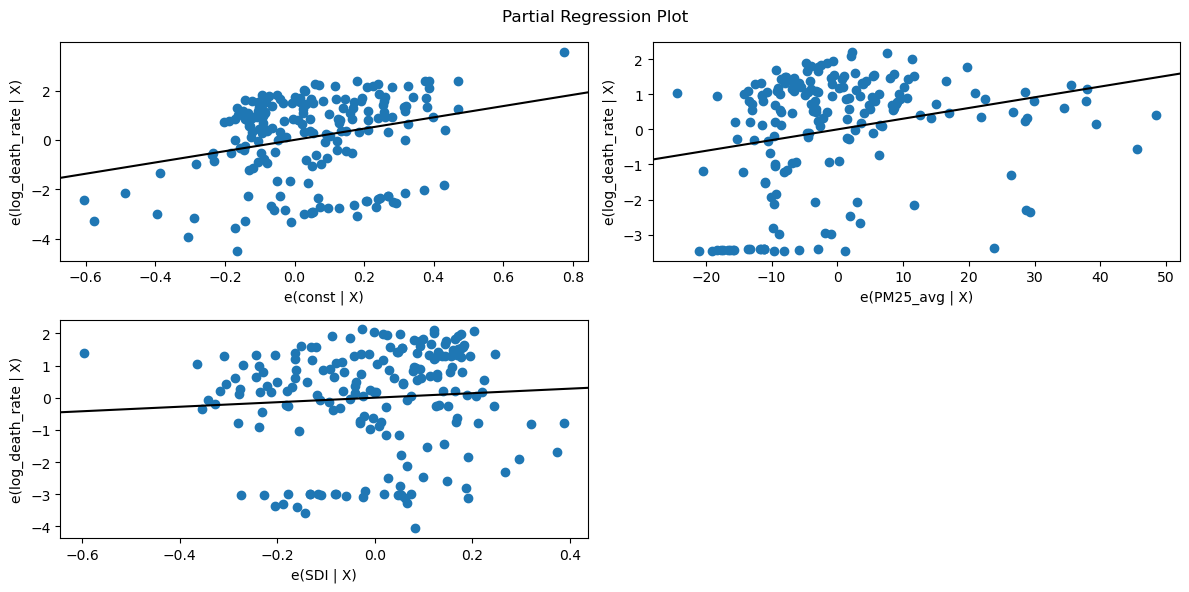

In [14]:
# Plot partial regression plots
fig = plt.figure(figsize=(12, 6))
sm.graphics.plot_partregress_grid(model_log, fig=fig)
plt.tight_layout()
plt.show()

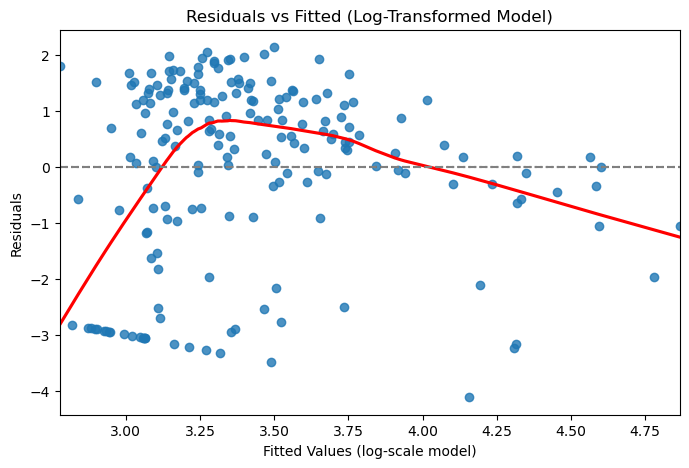

In [9]:
residuals_log = model_log.resid
fitted_log = model_log.fittedvalues

plt.figure(figsize=(8, 5))
sns.residplot(x=fitted_log, y=residuals_log, lowess=True, line_kws={"color": "red"})
plt.axhline(0, linestyle="--", color="gray")
plt.xlabel("Fitted Values (log-scale model)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (Log-Transformed Model)")
plt.show()

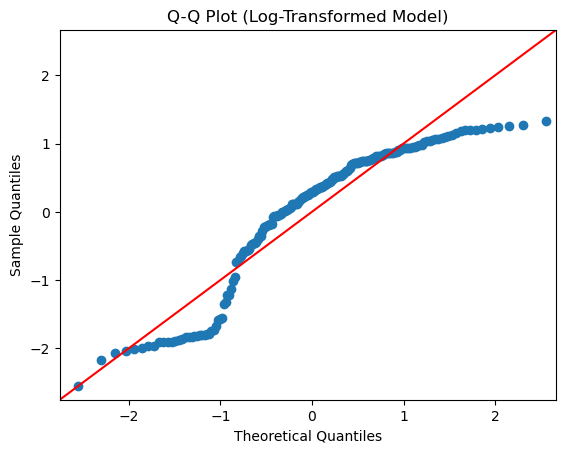

In [10]:
sm.qqplot(residuals_log, line="45", fit=True)
plt.title("Q-Q Plot (Log-Transformed Model)")
plt.show()

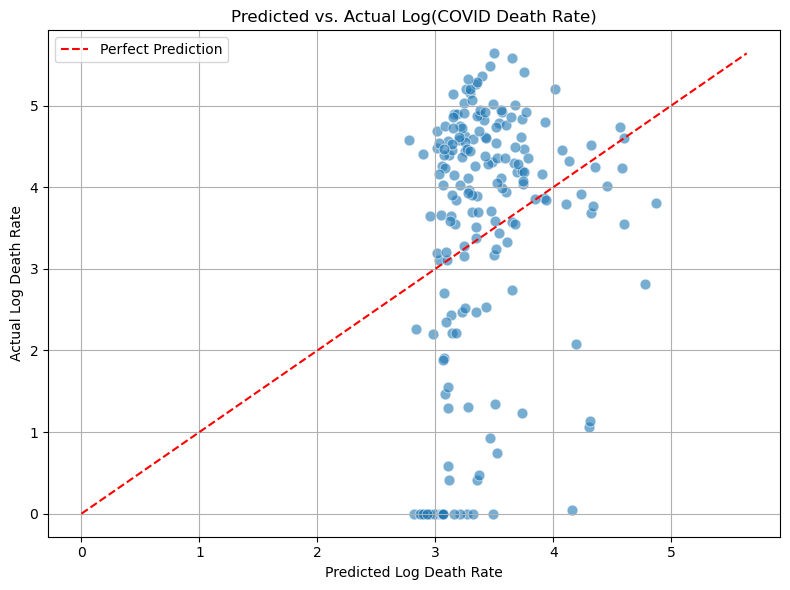

In [11]:
# Extract predicted values and actual log death rates
predicted_log = model_log.fittedvalues
actual_log = df["log_death_rate"]

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predicted_log, y=actual_log, alpha=0.6, s=60)
plt.plot(
    [actual_log.min(), actual_log.max()],
    [actual_log.min(), actual_log.max()],
    "r--",
    label="Perfect Prediction",
)

plt.xlabel("Predicted Log Death Rate")
plt.ylabel("Actual Log Death Rate")
plt.title("Predicted vs. Actual Log(COVID Death Rate)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 2. Interaction Effects Model

import statsmodels.formula.api as smf

# Using R-style formula
model = smf.ols("log_death_rate ~ PM25_avg * SDI", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         log_death_rate   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     4.729
Date:                Sun, 13 Jul 2025   Prob (F-statistic):            0.00333
Time:                        14:07:01   Log-Likelihood:                -358.92
No. Observations:                 190   AIC:                             725.8
Df Residuals:                     186   BIC:                             738.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2854      0.940      1.367   

<Figure size 1000x600 with 0 Axes>

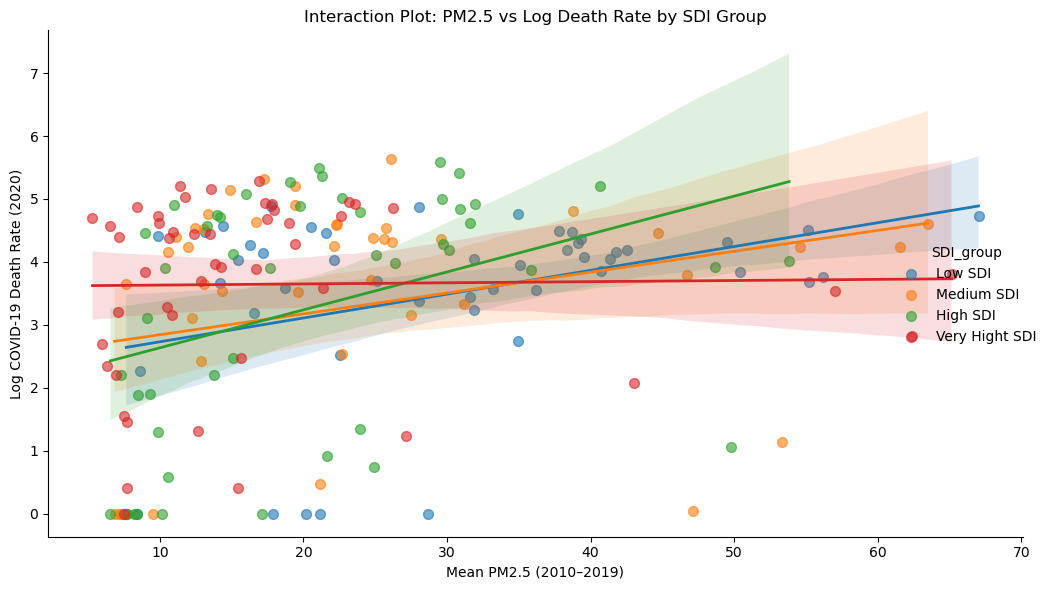

In [26]:
# Create SDI group labels
df["SDI_group"] = pd.qcut(
    df["SDI"], q=4, labels=["Low SDI", "Medium SDI", "High SDI", "Very Hight SDI"]
)

# Plot
plt.figure(figsize=(10, 6))
sns.lmplot(
    x="PM25_avg",
    y="log_death_rate",
    hue="SDI_group",
    data=df,
    height=6,
    aspect=1.5,
    scatter_kws={"alpha": 0.6, "s": 50},
    line_kws={"linewidth": 2},
)
plt.title("Interaction Plot: PM2.5 vs Log Death Rate by SDI Group")
plt.xlabel("Mean PM2.5 (2010–2019)")
plt.ylabel("Log COVID-19 Death Rate (2020)")
plt.tight_layout()
plt.show()